In [2]:
# megha smells
import matplotlib.pyplot as plt
import pandas
import folium

data = pandas.read_csv("AB_NYC_2019.csv")
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

# visualizations 
N
1. Heatmap based on prices  
2. Heatmap based on availability

R
3. Room_type vs Price 
4. Relationship bewteen rating and price

M
5. Heatmap based on rating
6. Room_type vs availability



# Machine Learning:
1. Based on other info -> Suggested Price

Text(0.5, 1.0, 'Rental Type vs Nightly Rate')

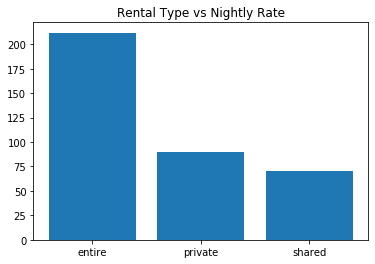

In [3]:
# Visulizations:



# 3. Room Type vs Price
data_by_roomtype = data.sort_values(["room_type"])
room_types = data_by_roomtype["room_type"].unique()


sums = {"entire": 0, "private": 0, "shared": 0}
tally = {"entire": 0, "private": 0, "shared": 0}
averages = {}

def generate_bar_plot(row):
    global sums, tally
    if(row["room_type"]=="Entire home/apt"):
        sums["entire"]+=row["price"]
        tally["entire"]+=1
    elif(row["room_type"]=="Private room"):
        sums["private"]+=row["price"]
        tally["private"]+=1
    elif(row["room_type"] == "Shared room"):
        sums["shared"]+=row["price"]
        tally["shared"]+=1

data_by_roomtype.apply(generate_bar_plot, axis=1)

for k in sums:
    averages[k] = sums[k]/tally[k]
    
plt.bar(averages.keys(), averages.values())

plt.title("Rental Type vs Nightly Rate")

In [17]:
from folium import plugins

map_hooray = folium.Map(location=[40.7, -73.9],
                    zoom_start = 10) 

df_acc = data 
# Ensure you're handing it floats
df_acc['latitude'] = df_acc['latitude'].astype(float)
df_acc['longitude'] = df_acc['longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
heat_df = df_acc[df_acc['reviews_per_month']>5] # Reducing data size so it runs faster# Reducing data size so it runs faster
heat_df = heat_df[['latitude', 'longitude', 'price']]

# Create weight column, using date
heat_df = heat_df.dropna(axis=0, subset=['latitude','longitude', 'price'])

# List comprehension to make out list of lists
heat_data = [[[row['latitude'],row['longitude']] for index, row in heat_df[heat_df["price"]>20*i][heat_df["price"]<20*(i+1)].iterrows()] for i in range(0, 50)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.7)
hm.add_to(map_hooray)
# Display the map
map_hooray

C:\Users\rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [44]:
heat_df

,latitude,longitude,price
471,40.70283,-73.92131,60
534,40.65513,-73.95641,43
553,40.75895,-73.98830,150
1103,40.67747,-73.76493,39
1125,40.82537,-73.94392,85
...,...,...,...
47579,40.64567,-73.89091,45
47585,40.74942,-73.98170,95
47708,40.69298,-73.86396,50
47967,40.76384,-73.98248,125
